# Data Analysis and Classic Machine Learning Techniques
***
# Table of Contents
1.   [Imports](#Imports)
2.   [Loading The Dataset](#Loading-The-Dataset)
3.   [Data Analysis](#Data-Analysis)
4.   [Data Pre-Processing](#Data-Pre-Processing)
4.   [Different Model Comparison](#Different-Model-Comparison)
5.   [Support Vector Machine](#Support-Vector-Machine)


# Imports

The necessary libraries are imported at this stage.

* pandas - Dataframe object is useful for data processing and analyses.
* sklearn - Provides a number of models, metrics and general functionality for machine learning.
* matplotlib - Provides plotting.

In [1]:
import pandas as pd
from time import time
from IPython.display import display # Allows the use of display() for DataFrames
import itertools
import numpy as np
#from google.colab import drive #Only needed on Colab
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score, fbeta_score, precision_score, recall_score, confusion_matrix, make_scorer
from sklearn.model_selection import GridSearchCV, train_test_split, ParameterGrid
# Pretty display for notebooks
%matplotlib inline

# Loading The Dataset

In this section we load the dataset first from a single file.

Using **sklearn** functions, this dataset is split into the training and testing data, which are then exported as CSV files.

In [2]:
def split_data():
    """Splits dataset into training and testing and exports them as CSV files"""

    all_data = pd.read_csv("Our Datasets/all data.csv", encoding="utf-8")

    train_pct_index = int(0.8 * len(all_data))
    all_data = shuffle(all_data)
    
    train, test = all_data[:train_pct_index], all_data[train_pct_index:]
    
    train.to_csv('Our Datasets/train.csv', index = False)
    test.to_csv('Our Datasets/test.csv', index = False)
split_data()

In [4]:
#mount drive
#drive.mount("/content/drive")
#path_to_data = "" #"drive/MyDrive/Kaggle/"


train = pd.read_csv("Our Datasets/train.csv", encoding="utf-8")
test = pd.read_csv("Our Datasets/test.csv", encoding="utf-8")

#Check it loaded ok
#display(train.head(n=1))
#display(test.head(n=1))

In [5]:
print("\nTrain:\n")
print(train.head())
print(train.shape)

print("\nTest:\n")
print(test.head())
print(test.shape)


Train:

      Label  angle(X-axis, gravityMean  angle(Y-axis, gravityMean  \
0  SWIMMING                   1.533340                   0.177468   
1    LAYING                   2.512270                   2.141021   
2   WALKING                   1.657121                   2.995210   
3  SWIMMING                   1.595915                   0.028301   
4   DRIVING                   2.851780                   1.281093   

   angle(Z-axis, gravityMean  angle(tBodyAccJerkMean, gravityMean)  \
0                   1.397408                              1.424107   
1                   1.333982                              2.092691   
2                   1.688720                              3.043389   
3                   1.557760                              1.367152   
4                   1.578546                              2.179475   

   angle(tBodyAccMean, gravityMean)  angle(tBodyGyroJerkMean, gravityMean)  \
0                          0.778858                               1.418860   

# Data Analysis

In this section analysis over the data is done to determine the processing steps necessary for the [next section](#Data-Pre-Processing).

## Check for Common Elements

The training and test data are merged using inner join to see if there is any overlapping data. The output is an empty data frame - containing only the list of different features - meaning that there are no intersections between the two.

In [6]:
merged = pd.merge(train, test, how='inner')
print(merged)

        Label  angle(X-axis, gravityMean  angle(Y-axis, gravityMean  \
0      LAYING                   2.955601                   1.660552   
1      LAYING                   1.108539                   1.718880   
2   STAIRS UP                   1.490556                   3.061348   
3      LAYING                   0.823886                   1.504532   
4      LAYING                   0.825884                   1.504740   
..        ...                        ...                        ...   
86     LAYING                   0.826633                   1.504670   
87     LAYING                   2.956358                   1.660879   
88  STAIRS UP                   1.543986                   2.978967   
89     LAYING                   2.991538                   1.699197   
90     LAYING                   2.991248                   1.699008   

    angle(Z-axis, gravityMean  angle(tBodyAccJerkMean, gravityMean)  \
0                    1.408338                              2.409185   
1    

## Shuffle the data

In [7]:
train = shuffle(train)
test = shuffle(test)

## Check for null values in rows

In [8]:
print("Any missing sample in training set:", train.isnull().values.any())
print("Any missing sample in test set:", test.isnull().values.any(), "\n")

Any missing sample in training set: False
Any missing sample in test set: False 



## Label Distribution

### Label Distribution in a Pie Chart

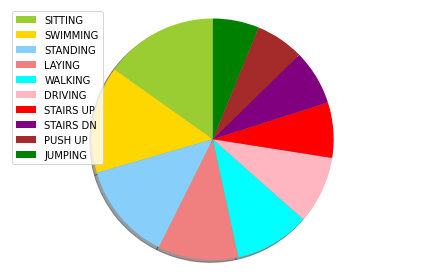

In [9]:
# Visualizing Training Activity Distribution
temp = train["Label"].value_counts()
df = pd.DataFrame({'labels': temp.index,
                   'values': temp.values
                  })

labels = df['labels']
sizes = df['values']
colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral', 'cyan','lightpink', 'red', 'purple', 'brown', 'green']
patches, texts = plt.pie(sizes, colors=colors, shadow=True, startangle=90, pctdistance=1.1, labeldistance=1.2)
plt.legend(patches, labels, loc="best")
plt.axis('equal')
plt.tight_layout()
plt.show()

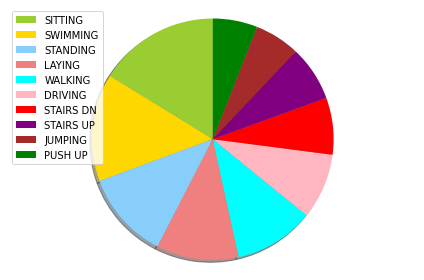

In [10]:
# Visualizing Test Activity Distribution
temp = test["Label"].value_counts()
df = pd.DataFrame({'labels': temp.index,
                   'values': temp.values
                  })

labels = df['labels']
sizes = df['values']
colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral', 'cyan','lightpink', 'red', 'purple', 'brown', 'green']
patches, texts = plt.pie(sizes, colors=colors, shadow=True, startangle=90, pctdistance=1.1, labeldistance=1.2)
plt.legend(patches, labels, loc="best")
plt.axis('equal')
plt.tight_layout()
plt.show()

### Label Distribution in a Column Format

In [11]:
train_outcome = pd.crosstab(index=train["Label"], columns="count")
test_outcome = pd.crosstab(index=test["Label"], columns="count")
print("Training Data")
print(train_outcome)
print("\nTest Data")
print(test_outcome)

Training Data
col_0      count
Label           
DRIVING      589
JUMPING      402
LAYING       699
PUSH UP      423
SITTING      986
STAIRS DN    480
STAIRS UP    482
STANDING     855
SWIMMING     932
WALKING      655

Test Data
col_0      count
Label           
DRIVING      143
JUMPING       99
LAYING       179
PUSH UP       97
SITTING      264
STAIRS DN    124
STAIRS UP    120
STANDING     192
SWIMMING     234
WALKING      174


# Data Pre-Processing

The dataset only requires a small number of pre-processing mainly, splitting the sets into X and y variables, categorical
variable encoding (for the label), and scaling.

The *activity* and *subject* columns are removed from the training and test data. **Y_train_label** and **Y_test_label** are the classifications of the activity of each row in the respective dataframes.

In [12]:
X_train = pd.DataFrame(train.drop(['Label'],axis=1))
Y_train_label = train.Label.values.astype(object)
X_test = pd.DataFrame(test.drop(['Label'],axis=1))
Y_test_label = test.Label.values.astype(object)

print("Dimension of Train set",X_train.shape)
print("Dimension of Test set",X_test.shape,"\n")

# Transforming non numerical labels into numerical labels
encoder = preprocessing.LabelEncoder()

# encoding train labels
encoder.fit(Y_train_label)
Y_train = encoder.transform(Y_train_label)

# encoding test labels
encoder.fit(Y_test_label)
Y_test = encoder.transform(Y_test_label)

#Total Number of Continuous features in the training set
num_cols = X_train._get_numeric_data().columns
print("Number of Continuous Features:",num_cols.size)

#names_of_predictors = list(X_train.columns.values) #Names of each feature

# Scaling the Train and Test feature set
# Because - values and classification
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train) #fit_transform is performed on training data
X_test_scaled = scaler.transform(X_test) #transform is performed on test data

Dimension of Train set (6503, 589)
Dimension of Test set (1626, 589) 

Number of Continuous Features: 589


# Different Model Comparison

In this step we compare 4 classic ml models.

In [13]:
clf_A = GaussianNB()
clf_B = AdaBoostClassifier(random_state=0)
clf_C = SVC(random_state=0)
clf_D = SGDClassifier(random_state=0)

learners = {}
learners["Gaussian Naive Bayes"] = clf_A
learners["AdaBoost"] = clf_B
learners["Stochastic Gradient Descent Classifier"] = clf_C
learners["Support Vector Machine"] = clf_D

def train_predict(learners, X_train, y_train, X_test, y_test):
    for learner in learners:
        print("Learner:", learner,"\n------")
        print("Training Data")
        start = time()
        learners[learner].fit(X_train, y_train)
        end = time()
        print("Time taken:", end-start, "seconds")

        print("Testing Data")
        start = time()
        predictions_test = learners[learner].predict(X_test)
        end = time()
        print("Time taken:", end-start, "seconds")


        print("\nAccuracy Score")
        print(accuracy_score(y_test,predictions_test))

        print("\nBeta Score")
        print(fbeta_score(y_test,predictions_test,beta=0.5,average='weighted'))

        print("\nPrecision Score")
        print(precision_score(y_test, predictions_test, average='weighted'))

        print("\nRecall Score")
        print(recall_score(y_test, predictions_test, average='weighted'),'\n')

train_predict(learners, X_train_scaled, Y_train, X_test_scaled, Y_test)

Learner: Gaussian Naive Bayes 
------
Training Data
Time taken: 0.07400989532470703 seconds
Testing Data
Time taken: 0.05699968338012695 seconds

Accuracy Score
0.7201722017220172

Beta Score
0.7327177011121799

Precision Score
0.7693466045133841

Recall Score
0.7201722017220172 

Learner: AdaBoost 
------
Training Data
Time taken: 18.906753540039062 seconds
Testing Data
Time taken: 0.10800004005432129 seconds

Accuracy Score
0.4138991389913899

Beta Score
0.26191057989133837

Precision Score
0.45423758577878603

Recall Score
0.4138991389913899 

Learner: Support Vector Machine 
------
Training Data
C:\Users\Jake Sant\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
Time taken: 1.2560033798217773 seconds
Testing Data
Time t

As can be seen from the above metrics, SVM is quite clearly the most accurate classifier of the three, and it is for that reason that we will use it as one of the main classifiers for the group practical task

# Support Vector Classifier

There are a number of different parameters we can apply to SVC in order to obtain the best results possible. These different parameters were passed through a Grid Search model, which applies all of them to train various SVCs.

In [19]:
clf = SVC(random_state=0)

parameters =    {
                "kernel": ['poly', 'rbf', 'sigmoid'],
                "C": [50, 10, 1.0, 0.1, 0.01],
                "gamma": ['scale']
                }

scorer = make_scorer(fbeta_score, beta=0.5,average='weighted')
grid_obj = GridSearchCV(clf, parameters, scoring=scorer)
grid_fit = grid_obj.fit(X_train_scaled,Y_train)

# Get the estimator
best_clf = grid_fit.best_estimator_
clf.fit(X_train_scaled, Y_train)
# Make predictions using the unoptimized and model
predictions = clf.predict(X_test)
best_predictions = best_clf.predict(X_test_scaled)

# Report the before-and-afterscores
print("Unoptimized model\n------")
print("Accuracy score on the testing data: {:.4f}".format(accuracy_score(Y_test, predictions)))
print("F-score on the testing data: {:.4f}".format(fbeta_score(Y_test, predictions, beta = 0.5,average='weighted')))
print("Precision score on the testing data: {:.4f}".format(precision_score(Y_test, predictions, average='weighted')))
print("Recall score on the testing data: {:.4f}".format(recall_score(Y_test, predictions, average='weighted')))
print("\nOptimized Model\n------")
print("Final accuracy score on the testing data: {:.4f}".format(accuracy_score(Y_test, best_predictions)))
print("Final F-score on the testing data: {:.4f}".format(fbeta_score(Y_test, best_predictions, beta = 0.5,average='weighted')))
print("Final precision score on the testing data: {:.4f}".format(precision_score(Y_test, best_predictions, average='weighted', zero_division=0)))
print("Final recall score on the testing data: {:.4f}".format(recall_score(Y_test, best_predictions, average='weighted', zero_division=0)))

Unoptimized model
------
Accuracy score on the testing data: 0.0609
F-score on the testing data: 0.0046
Precision score on the testing data: 0.0037
Recall score on the testing data: 0.0609

Optimized Model
------
Final accuracy score on the testing data: 0.9815
Final F-score on the testing data: 0.9817
Final precision score on the testing data: 0.9817
Final recall score on the testing data: 0.9815
C:\Users\Jake Sant\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


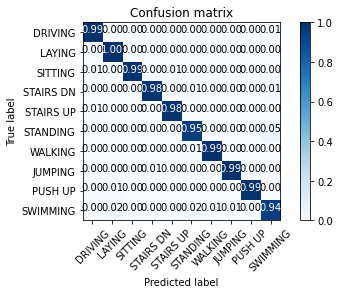

In [15]:
#Confusion Matrix maps out the predicted label given to the data with the actual label
#Helps us check the rate of true/false positives and true/false negatives
#parameters are the true labels, and the predicted labels

# https://sklearn.org/auto_examples/model_selection/plot_confusion_matrix.html
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


cnf_matrix = confusion_matrix(Y_test, best_predictions)
np.set_printoptions(precision=2)

classes =    {
                        "DRIVING": 0,
                        "LAYING": 2,
                        "SITTING": 4,
                        "STAIRS DN": 5,
                        "STAIRS UP": 6,
                        "STANDING": 7,
                        "WALKING": 9,
                        "JUMPING": 1,
                        "PUSH UP": 3,
                        "SWIMMING": 8
                    }

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=classes, normalize=True,title='Confusion matrix')


In [16]:
print("The best parameters were:", grid_fit.best_params_)


The best parameters were: {'C': 50, 'gamma': 'scale', 'kernel': 'rbf'}
